In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [103]:
df = pd.read_csv('./Data/dengue_features_train.csv')
df_label = pd.read_csv('./Data/dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [104]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [128]:
sj_data = data[data['city'] == 'sj']

In [129]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanalysis_

In [130]:
# Step 1: fillna with most recent value , should use for different cities (2 seperate tables)
def fill_na(df):
    for feature in df.keys():
        df[feature].fillna(method='ffill', inplace=True)
    return df

# Step 2 : fix wrong values
def wrong_week_num(df):
    df.loc[df["weekofyear"] == 53, "weekofyear"] = 1
    return df

In [131]:
def process_data(df):
    df_new = df.copy()
    df_new = fill_na(df_new)
    df_new = wrong_week_num(df_new)
    return df_new

In [132]:
sj_data = process_data(sj_data)

In [133]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [134]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [118]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'avg_ndvi'],
      dtype='object')

In [135]:
sj_data = sj_data[['week_start_date','total_cases', 'avg_ndvi',
                   'reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                'avg_reanalysis',
                 'station_avg_temp_c', 
                 'station_min_temp_c']]

In [136]:
sj_data.head()

,week_start_date,total_cases,avg_ndvi,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,avg_reanalysis,station_avg_temp_c,station_min_temp_c
0,1990-04-30,4,0.150606,14.012857,292.414286,296.686000,25.442857,20.0
1,1990-05-07,5,0.157479,15.372857,293.951429,297.581143,26.714286,22.2
2,1990-05-14,4,0.133315,16.848571,295.434286,298.178857,26.714286,22.8
3,1990-05-21,3,0.209286,16.672857,295.310000,298.385143,27.471429,23.3
4,1990-05-28,6,0.239235,17.210000,295.821429,298.880857,28.942857,23.9


In [137]:
from prophet import Prophet

In [138]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        936 non-null    object 
 1   total_cases                            936 non-null    int64  
 2   avg_ndvi                               936 non-null    float64
 3   reanalysis_specific_humidity_g_per_kg  936 non-null    float64
 4   reanalysis_dew_point_temp_k            936 non-null    float64
 5   avg_reanalysis                         936 non-null    float64
 6   station_avg_temp_c                     936 non-null    float64
 7   station_min_temp_c                     936 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 65.8+ KB


In [139]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [140]:
test_df_main = pd.read_csv('./Data/dengue_features_test.csv')
sj_test_df = test_df_main[test_df_main['city']=='sj']
sj_test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [142]:
sj_test_df = process_data(sj_test_df)

In [143]:
sj_test_df['avg_reanalysis'] = sj_test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

sj_test_df['avg_ndvi'] = sj_test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [146]:
sj_test_df = sj_test_df[['week_start_date', 'avg_ndvi',
                   'reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                'avg_reanalysis',
                 'station_avg_temp_c', 
                 'station_min_temp_c']]

In [147]:
sj_test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
sj_test_df.head()


,ds,avg_ndvi,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,avg_reanalysis,station_avg_temp_c,station_min_temp_c
0,2008-04-29,0.039032,15.918571,294.527143,297.814000,26.528571,21.7
1,2008-05-06,0.030989,15.791429,294.395714,297.785714,26.071429,22.2
2,2008-05-13,0.057178,16.674286,295.308571,298.544286,27.928571,22.8
3,2008-05-20,0.057162,15.775714,294.402857,298.744286,28.057143,24.4
4,2008-05-27,0.058704,16.137143,294.760000,298.762286,27.614286,23.3


In [151]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_dew_point_temp_k')
    m.add_regressor('station_avg_temp_c')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('reanalysis_dew_point_temp_k')
auto_model_sj.add_regressor('station_avg_temp_c')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.add_regressor('reanalysis_specific_humidity_g_per_kg')
auto_model_sj.fit(sj_data)

19:36:35 - cmdstanpy - INFO - Chain [1] start processing
19:36:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] start p

19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:56 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:56 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:37:10 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:25 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:26 - cmdstanpy - INFO - Chain [1] start processi

19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] 

19:37:56 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:56 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing
19:37:57 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:57 - cmdstanpy - INFO - Chain [1] start processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing
19:37:57 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:06 -

19:38:19 - cmdstanpy - INFO - Chain [1] done processing
19:38:19 - cmdstanpy - INFO - Chain [1] start processing
19:38:19 - cmdstanpy - INFO - Chain [1] done processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
19:38:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
19:38:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1]

19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing
19:38:43 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1]

19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:39:04 - cmdstanpy - I

19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing
19:39:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing
19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing
19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing
19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1]

19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1]

19:39:56 - cmdstanpy - INFO - Chain [1] start processing
19:39:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:02 - cmdstanpy - INFO - Chain [1] done processing
19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1] done processing
19:40:06 - cmdstanpy - INFO - Chain [1] start processing
19:40:09 - cmdstanpy - INFO - Chain [1] done processing
19:40:09 - cmdstanpy - INFO - Chain [1] done processing
19:40:09 - cmdstanpy - INFO - Chain [1] start processing
19:40:09 - cmdstanpy - INFO - Chain [1] start processing
19:40:14 - cmdstanpy - INFO - Chain [1] done processing
19:40:14 - cmdstanpy - INFO - Chain [1] start p

19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abno

19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:56 - cmdstanpy - INFO - Chain [1] start processing
19:40:56 - cmdstanpy - INFO - Chain [1] done processing
19:40:56 - cmdstanpy - INFO - Chain [1] start processing
19:40:56 - cmdstanpy - INFO - Chain [1] done processing
19:40:56 - cmdstanpy - INFO - Chain [1] start proces

19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1]

19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 -

19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing
19:41:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:42:01 - cmdstanpy - INFO - Chain [1] start processing
19:42:01 - cmdstanpy - INFO - Chain [1] done processing
19:42:02 - cmdstanpy - INFO - Chain [1] start processing
19:42:02 - cmdstanpy - INFO - Chain [1] done processing
19:42:02 - cmdstanpy - INFO - Chain [1] start processing
19:42:02 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:03 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:03 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:03 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] start processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] start processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] 

19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] done process

19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:48 - cmdstanpy - INFO - Chain [1] done processing
19:42:48 - cmdstanpy - INFO - Chain [1] start processing
19:42:48 - cmdstanpy - INFO - Chain [1] done processing
19:42:48 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:42:57 - cmdstanpy - INFO - Chain [1] done processing
19:42:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - INFO - Chain [1] start processing
19:42:59 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abno

19:43:09 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:11 - cmdstanpy - INFO - Chain [1] done processing
19:43:11 - cmdstanpy - INFO - Chain [1] start processing
19:43:11 - cmdstanpy - INFO - Chain [1] done processing
19:43:11 - cmdstanpy - INFO - Chain [1] start processi

19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] 

19:43:28 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:30 - cmdstanpy - INFO - Chain [1] done processing
19:43:30 - cmdstanpy - INFO - Chain [1] done processing
19:43:30 - cmdstanpy - INFO - Chain [1] 

19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:44:02 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - 

19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] 

19:44:48 - cmdstanpy - INFO - Chain [1] done processing
19:44:48 - cmdstanpy - INFO - Chain [1] start processing
19:44:49 - cmdstanpy - INFO - Chain [1] done processing
19:44:49 - cmdstanpy - INFO - Chain [1] start processing
19:44:50 - cmdstanpy - INFO - Chain [1] done processing
19:44:50 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] s

19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing
19:45:03 - 

19:45:12 - cmdstanpy - INFO - Chain [1] done processing
19:45:12 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:45:13 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - ERROR - Chain [1] error: error during proces

19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:26 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:26 - cmdstanpy - ERROR - Chain [1] error: error 

19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1]

19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1]

19:45:59 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] done processing
19:46:01 - cmdstanpy - INFO - Chain [1] 

19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:09 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:09 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:10 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] 

19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:28 - cmdstanpy - INFO - Chain [1] start processing
19:46:28 - cmdstanpy - INFO - Chain [1]

19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:36 - cmdstanpy - INFO - Chain [1] 

19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1]

19:47:03 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing
19:47:03 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1]

19:47:11 - cmdstanpy - INFO - Chain [1] done processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] 

19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:22 - cmdstanpy - INFO - Chain [1] done processing
19:47:22 - cmdstanpy - INFO - Chain [1] start processing
19:47:22 - cmdstanpy - INFO - Chain [1] start processing
19:47:22 - cmdstanpy - INFO - Chain [1] done processing
19:47:22 - cmdstanpy - INFO - Chain [1] 

19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] 

19:47:49 - cmdstanpy - INFO - Chain [1] done processing
19:47:49 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:51 - cmdstanpy - INFO - Chain [1] start processing
19:47:51 - cmdstanpy - INFO - Chain [1] done processing
19:47:51 - cmdstanpy - INFO - Chain [1] start processing
19:47:51 - cmdstanpy - INFO - Chain [1] done processing
19:47:51 - cmdstanpy - INFO - Chain [1] 

19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
19:48:07 - cmdstanpy - INFO - Chain [1] 

19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] 

19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:34 - cmdstanpy - INFO - Chain [1] done processing
19:48:34 - cmdstanpy - INFO - Chain [1] done processing
19:48:34 - cmdstanpy - INFO - Chain [1] 

19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:44 - cmdstanpy - INFO - Chain [1] done processing
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1] done processing
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1] 

19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1]

19:49:12 - cmdstanpy - INFO - Chain [1] done processing
19:49:12 - cmdstanpy - INFO - Chain [1] start processing
19:49:12 - cmdstanpy - INFO - Chain [1] start processing
19:49:12 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:14 - cmdstanpy - INFO - Chain [1] done processing
19:49:14 - cmdstanpy - INFO - Chain [1] start processing
19:49:14 - cmdstanpy - INFO - Chain [1] done processing
19:49:14 - cmdstanpy - INFO - Chain [1]

19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:31 - cmdstanpy - INFO - Chain [1] start processing
19:49:31 - cmdstanpy - INFO - Chain [1] done processing
19:49:31 - cmdstanpy - INFO - Chain [1] done processing
19:49:31 - cmdstanpy - INFO - Chain [1] start processing
19:49:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days whi

19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
19:49:47 - cmdstanpy - INFO - Chain [1] start processing
19:49:47 - cmdstanpy - INFO - Chain [1] start processing
19:49:47 - cmdstanpy - INFO - Chain [1]

19:49:54 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
19:49:56 - cmdstanpy - INFO - Chain [1] 

19:50:06 - cmdstanpy - INFO - Chain [1] done processing
19:50:06 - cmdstanpy - INFO - Chain [1] done processing
19:50:06 - cmdstanpy - INFO - Chain [1] start processing
19:50:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:12 - cmdstanpy - INFO - Chain [1] done processing
19:50:12 - cmdstanpy - INFO - Chain [1] done processing
19:50:12 - cmdstanpy - INFO - Chain [1] start processing
19:50:12 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
19:50:13 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] start pr

19:50:23 - cmdstanpy - INFO - Chain [1] done processing
19:50:23 - cmdstanpy - INFO - Chain [1] start processing
19:50:23 - cmdstanpy - INFO - Chain [1] done processing
19:50:23 - cmdstanpy - INFO - Chain [1] start processing
19:50:23 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:25 - cmdstanpy - INFO - Chain [1] 

19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1

19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:01 - cmdstanpy - INFO - Chain [1] done processing
19:51:01 - cmdstanpy - INFO - Chain [1] start processing
19:51:02 - cmdstanpy - INFO - Chain [1] done processing
19:51:02 - cmdstanpy - INFO - Chain [1] start processing
19:51:02 - cmdstanpy - INFO - Chain [1] done processing
19:51:02 - cmdstanpy - INFO - Chain [1] start processing
19:51:03 - cmdstanpy - INFO - Chain [1] done processing
19:51:03 - cmdstanpy - INFO - Chain [1] start processing
19:51:03 - cmdstanpy - INFO - Chain [1] done processing
19:51:03 - cmdstanpy - INFO - Chain [1] 

19:51:19 - cmdstanpy - INFO - Chain [1] done processing
19:51:19 - cmdstanpy - INFO - Chain [1] start processing
19:51:19 - cmdstanpy - INFO - Chain [1] start processing
19:51:19 - cmdstanpy - INFO - Chain [1] done processing
19:51:19 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] done processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] 

19:51:49 - cmdstanpy - INFO - Chain [1] done processing
19:51:49 - cmdstanpy - INFO - Chain [1] done processing
19:51:49 - cmdstanpy - INFO - Chain [1] start processing
19:51:49 - cmdstanpy - INFO - Chain [1] start processing
19:51:50 - cmdstanpy - INFO - Chain [1] done processing
19:51:50 - cmdstanpy - INFO - Chain [1] start processing
19:51:50 - cmdstanpy - INFO - Chain [1] done processing
19:51:51 - cmdstanpy - INFO - Chain [1] start processing
19:51:51 - cmdstanpy - INFO - Chain [1] done processing
19:51:51 - cmdstanpy - INFO - Chain [1] start processing
19:51:51 - cmdstanpy - INFO - Chain [1] done processing
19:51:52 - cmdstanpy - INFO - Chain [1] start processing
19:51:53 - cmdstanpy - INFO - Chain [1] done processing
19:51:53 - cmdstanpy - INFO - Chain [1] done processing
19:51:53 - cmdstanpy - INFO - Chain [1] start processing
19:51:53 - cmdstanpy - INFO - Chain [1] start processing
19:51:53 - cmdstanpy - INFO - Chain [1] done processing
19:51:54 - cmdstanpy - INFO - Chain [1] 

19:52:36 - cmdstanpy - INFO - Chain [1] start processing
19:52:37 - cmdstanpy - INFO - Chain [1] done processing
19:52:37 - cmdstanpy - INFO - Chain [1] start processing
19:52:37 - cmdstanpy - INFO - Chain [1] done processing
19:52:37 - cmdstanpy - INFO - Chain [1] start processing
19:52:38 - cmdstanpy - INFO - Chain [1] done processing
19:52:38 - cmdstanpy - INFO - Chain [1] done processing
19:52:38 - cmdstanpy - INFO - Chain [1] start processing
19:52:38 - cmdstanpy - INFO - Chain [1] start processing
19:52:40 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:41 - cmdstanpy - INFO - Chain [1] done processing
19:52:41 - cmdstanpy - INFO - Chain [1] start processing
19:52:42 - cmdstanpy - INFO - Chain [1] done processing
19:52:42 - cmdstanpy - INFO - Chain [1] start processing
19:52:43 - cmdstanpy - INFO - Chain [1]

19:52:57 - cmdstanpy - INFO - Chain [1] start processing
19:52:57 - cmdstanpy - INFO - Chain [1] start processing
19:52:57 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:59 - cmdstanpy - INFO - Chain [1] done processing
19:52:59 - cmdstanpy - INFO - Chain [1] start processing
19:52:59 - cmdstanpy - INFO - Chain [1] done processing
19:52:59 - cmdstanpy - INFO - Chain [1] done processing
19:53:00 - cmdstanpy - INFO - Chain [1] start processing
19:53:00 - cmdstanpy - INFO - Chain [1]

19:53:31 - cmdstanpy - INFO - Chain [1] start processing
19:53:32 - cmdstanpy - INFO - Chain [1] done processing
19:53:32 - cmdstanpy - INFO - Chain [1] start processing
19:53:32 - cmdstanpy - INFO - Chain [1] done processing
19:53:33 - cmdstanpy - INFO - Chain [1] start processing
19:53:33 - cmdstanpy - INFO - Chain [1] done processing
19:53:34 - cmdstanpy - INFO - Chain [1] start processing
19:53:34 - cmdstanpy - INFO - Chain [1] done processing
19:53:34 - cmdstanpy - INFO - Chain [1] done processing
19:53:35 - cmdstanpy - INFO - Chain [1] done processing
19:53:35 - cmdstanpy - INFO - Chain [1] start processing
19:53:35 - cmdstanpy - INFO - Chain [1] start processing
19:53:35 - cmdstanpy - INFO - Chain [1] start processing
19:53:35 - cmdstanpy - INFO - Chain [1] done processing
19:53:36 - cmdstanpy - INFO - Chain [1] start processing
19:53:36 - cmdstanpy - INFO - Chain [1] done processing
19:53:36 - cmdstanpy - INFO - Chain [1] done processing
19:53:36 - cmdstanpy - INFO - Chain [1] 

19:54:21 - cmdstanpy - INFO - Chain [1] done processing
19:54:21 - cmdstanpy - INFO - Chain [1] start processing
19:54:21 - cmdstanpy - INFO - Chain [1] done processing
19:54:22 - cmdstanpy - INFO - Chain [1] start processing
19:54:22 - cmdstanpy - INFO - Chain [1] done processing
19:54:22 - cmdstanpy - INFO - Chain [1] start processing
19:54:24 - cmdstanpy - INFO - Chain [1] done processing
19:54:24 - cmdstanpy - INFO - Chain [1] start processing
19:54:25 - cmdstanpy - INFO - Chain [1] done processing
19:54:25 - cmdstanpy - INFO - Chain [1] start processing
19:54:26 - cmdstanpy - INFO - Chain [1] done processing
19:54:26 - cmdstanpy - INFO - Chain [1] start processing
19:54:27 - cmdstanpy - INFO - Chain [1] done processing
19:54:27 - cmdstanpy - INFO - Chain [1] start processing
19:54:27 - cmdstanpy - INFO - Chain [1] done processing
19:54:27 - cmdstanpy - INFO - Chain [1] start processing
19:54:27 - cmdstanpy - INFO - Chain [1] done processing
19:54:28 - cmdstanpy - INFO - Chain [1] 

19:54:41 - cmdstanpy - INFO - Chain [1] start processing
19:54:42 - cmdstanpy - INFO - Chain [1] done processing
19:54:42 - cmdstanpy - INFO - Chain [1] start processing
19:54:42 - cmdstanpy - INFO - Chain [1] done processing
19:54:42 - cmdstanpy - INFO - Chain [1] done processing
19:54:42 - cmdstanpy - INFO - Chain [1] start processing
19:54:42 - cmdstanpy - INFO - Chain [1] start processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:43 - cmdstanpy - INFO - Chain [1] start processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:43 - cmdstanpy - INFO - Chain [1] start processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:44 - cmdstanpy - INFO - Chain [1] done processing
19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:45 - cmdstanpy - INFO - Chain [1]

19:55:08 - cmdstanpy - INFO - Chain [1] done processing
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
19:55:09 - cmdstanpy - INFO - Chain [1] done processing
19:55:09 - cmdstanpy - INFO - Chain [1] done processing
19:55:09 - cmdstanpy - INFO - Chain [1] done processing
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
19:55:10 - cmdstanpy - INFO - Chain [1] done processing
19:55:10 - cmdstanpy - INFO - Chain [1] start processing
19:55:10 - cmdstanpy - INFO - Chain [1] done processing
19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:11 - cmdstanpy - INFO - Chain [1] done processing
19:55:11 - cmdstanpy - INFO - Chain [1] done processing
19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:11 - cmdstanpy - INFO - Chain [1] done processing
19:55:12 - cmdstanpy - INFO - Chain [1] 

19:55:49 - cmdstanpy - INFO - Chain [1] start processing
19:55:50 - cmdstanpy - INFO - Chain [1] done processing
19:55:50 - cmdstanpy - INFO - Chain [1] start processing
19:55:50 - cmdstanpy - INFO - Chain [1] done processing
19:55:50 - cmdstanpy - INFO - Chain [1] start processing
19:55:52 - cmdstanpy - INFO - Chain [1] done processing
19:55:52 - cmdstanpy - INFO - Chain [1] start processing
19:55:52 - cmdstanpy - INFO - Chain [1] done processing
19:55:52 - cmdstanpy - INFO - Chain [1] start processing
19:55:52 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] start processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] start processing
19:55:53 - cmdstanpy - INFO - Chain [1] start processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] 

19:56:05 - cmdstanpy - INFO - Chain [1] done processing
19:56:05 - cmdstanpy - INFO - Chain [1] start processing
19:56:06 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:06 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:08 - cmdstanpy - INFO - Chain [1] done processing
19:56:08 - cmdstanpy - INFO - Chain [1] done processing
19:56:08 - cmdstanpy - INFO - Chain [1] start processing
19:56:08 - cmdstanpy - INFO - Chain [1] 

19:56:29 - cmdstanpy - INFO - Chain [1] start processing
19:56:29 - cmdstanpy - INFO - Chain [1] start processing
19:56:30 - cmdstanpy - INFO - Chain [1] done processing
19:56:30 - cmdstanpy - INFO - Chain [1] done processing
19:56:30 - cmdstanpy - INFO - Chain [1] start processing
19:56:30 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:33 - cmdstanpy - INFO - Chain [1] done processing
19:56:33 - cmdstanpy - INFO - Chain [1] done processing
19:56:33 - cmdstanpy - INFO - Chain [1] done processing
19:56:33 - cmdstanpy - INFO - Chain [1] 

19:57:14 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:15 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:15 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:15 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] 

19:57:30 - cmdstanpy - INFO - Chain [1] start processing
19:57:30 - cmdstanpy - INFO - Chain [1] done processing
19:57:30 - cmdstanpy - INFO - Chain [1] done processing
19:57:31 - cmdstanpy - INFO - Chain [1] start processing
19:57:31 - cmdstanpy - INFO - Chain [1] start processing
19:57:31 - cmdstanpy - INFO - Chain [1] done processing
19:57:31 - cmdstanpy - INFO - Chain [1] done processing
19:57:31 - cmdstanpy - INFO - Chain [1] start processing
19:57:31 - cmdstanpy - INFO - Chain [1] start processing
19:57:31 - cmdstanpy - INFO - Chain [1] done processing
19:57:31 - cmdstanpy - INFO - Chain [1] done processing
19:57:32 - cmdstanpy - INFO - Chain [1] start processing
19:57:32 - cmdstanpy - INFO - Chain [1] start processing
19:57:32 - cmdstanpy - INFO - Chain [1] done processing
19:57:32 - cmdstanpy - INFO - Chain [1] done processing
19:57:32 - cmdstanpy - INFO - Chain [1] done processing
19:57:33 - cmdstanpy - INFO - Chain [1] start processing
19:57:33 - cmdstanpy - INFO - Chain [1] 

19:57:57 - cmdstanpy - INFO - Chain [1] start processing
19:57:57 - cmdstanpy - INFO - Chain [1] done processing
19:57:57 - cmdstanpy - INFO - Chain [1] done processing
19:57:57 - cmdstanpy - INFO - Chain [1] start processing
19:57:57 - cmdstanpy - INFO - Chain [1] start processing
19:57:58 - cmdstanpy - INFO - Chain [1] done processing
19:57:58 - cmdstanpy - INFO - Chain [1] start processing
19:57:59 - cmdstanpy - INFO - Chain [1] done processing
19:57:59 - cmdstanpy - INFO - Chain [1] start processing
19:58:00 - cmdstanpy - INFO - Chain [1] done processing
19:58:00 - cmdstanpy - INFO - Chain [1] start processing
19:58:01 - cmdstanpy - INFO - Chain [1] done processing
19:58:01 - cmdstanpy - INFO - Chain [1] start processing
19:58:01 - cmdstanpy - INFO - Chain [1] done processing
19:58:01 - cmdstanpy - INFO - Chain [1] start processing
19:58:01 - cmdstanpy - INFO - Chain [1] done processing
19:58:02 - cmdstanpy - INFO - Chain [1] start processing
19:58:02 - cmdstanpy - INFO - Chain [1]

19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1]

19:58:55 - cmdstanpy - INFO - Chain [1] start processing
19:58:55 - cmdstanpy - INFO - Chain [1] start processing
19:58:55 - cmdstanpy - INFO - Chain [1] done processing
19:58:55 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] start processing
19:58:57 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] 

19:59:20 - cmdstanpy - INFO - Chain [1] start processing
19:59:20 - cmdstanpy - INFO - Chain [1] start processing
19:59:20 - cmdstanpy - INFO - Chain [1] done processing
19:59:20 - cmdstanpy - INFO - Chain [1] done processing
19:59:21 - cmdstanpy - INFO - Chain [1] start processing
19:59:21 - cmdstanpy - INFO - Chain [1] start processing
19:59:21 - cmdstanpy - INFO - Chain [1] done processing
19:59:21 - cmdstanpy - INFO - Chain [1] done processing
19:59:22 - cmdstanpy - INFO - Chain [1] start processing
19:59:22 - cmdstanpy - INFO - Chain [1] start processing
19:59:22 - cmdstanpy - INFO - Chain [1] done processing
19:59:22 - cmdstanpy - INFO - Chain [1] start processing
19:59:23 - cmdstanpy - INFO - Chain [1] done processing
19:59:23 - cmdstanpy - INFO - Chain [1] start processing
19:59:24 - cmdstanpy - INFO - Chain [1] done processing
19:59:24 - cmdstanpy - INFO - Chain [1] done processing
19:59:24 - cmdstanpy - INFO - Chain [1] start processing
19:59:24 - cmdstanpy - INFO - Chain [1]

20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:03 - cmdstanpy - INFO - Chain [1] done processing
20:00:03 - cmdstanpy - INFO - Chain [1] start processing
20:00:03 - cmdstanpy - INFO - Chain [1] start processing
20:00:03 - cmdstanpy - INFO - Chain [1] start processing
20:00:03 - cmdstanpy - INFO - Chain [1] done processing
20:00:03 - cmdstanpy - INFO - Chain [1]

20:00:18 - cmdstanpy - INFO - Chain [1] start processing
20:00:18 - cmdstanpy - INFO - Chain [1] done processing
20:00:18 - cmdstanpy - INFO - Chain [1] done processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:19 - cmdstanpy - INFO - Chain [1] done processing
20:00:19 - cmdstanpy - INFO - Chain [1] done processing
20:00:19 - cmdstanpy - INFO - Chain [1] done processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:20 - cmdstanpy - INFO - Chain [1] done processing
20:00:20 - cmdstanpy - INFO - Chain [1] start processing
20:00:20 - cmdstanpy - INFO - Chain [1] done processing
20:00:20 - cmdstanpy - INFO - Chain [1] done processing
20:00:20 - cmdstanpy - INFO - Chain [1] done processing
20:00:20 - cmdstanpy - INFO - Chain [1] start processing
20:00:21 - cmdstanpy - INFO - Chain [1] 

20:00:45 - cmdstanpy - INFO - Chain [1] done processing
20:00:45 - cmdstanpy - INFO - Chain [1] start processing
20:00:46 - cmdstanpy - INFO - Chain [1] start processing
20:00:46 - cmdstanpy - INFO - Chain [1] done processing
20:00:46 - cmdstanpy - INFO - Chain [1] done processing
20:00:47 - cmdstanpy - INFO - Chain [1] done processing
20:00:47 - cmdstanpy - INFO - Chain [1] start processing
20:00:47 - cmdstanpy - INFO - Chain [1] start processing
20:00:47 - cmdstanpy - INFO - Chain [1] start processing
20:00:47 - cmdstanpy - INFO - Chain [1] done processing
20:00:48 - cmdstanpy - INFO - Chain [1] start processing
20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:48 - cmdstanpy - INFO - Chain [1] start processing
20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:48 - cmdstanpy - INFO - Chain [1] start processing
20:00:48 - cmdstanpy - INFO - Chain [1] start processing
20:00:49 - cmdstanpy - INFO - Chain [1]

20:01:53 - cmdstanpy - INFO - Chain [1] start processing
20:01:53 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:55 - cmdstanpy - INFO - Chain [1] start processing
20:01:55 - cmdstanpy - INFO - Chain [1] done processing
20:01:55 - cmdstanpy - INFO - Chain [1] done processing
20:01:55 - cmdstanpy - INFO - Chain [1] start processing
20:01:55 - cmdstanpy - INFO - Chain [1]

20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1] done processing
20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1] done processing
20:02:14 - cmdstanpy - INFO - Chain [1] done processing
20:02:14 - cmdstanpy - INFO - Chain [1] done processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
20:02:16 - cmdstanpy - INFO - Chain [1

20:03:11 - cmdstanpy - INFO - Chain [1] done processing
20:03:12 - cmdstanpy - INFO - Chain [1] start processing
20:03:13 - cmdstanpy - INFO - Chain [1] done processing
20:03:13 - cmdstanpy - INFO - Chain [1] done processing
20:03:13 - cmdstanpy - INFO - Chain [1] start processing
20:03:13 - cmdstanpy - INFO - Chain [1] start processing
20:03:14 - cmdstanpy - INFO - Chain [1] done processing
20:03:14 - cmdstanpy - INFO - Chain [1] start processing
20:03:14 - cmdstanpy - INFO - Chain [1] done processing
20:03:15 - cmdstanpy - INFO - Chain [1] start processing
20:03:15 - cmdstanpy - INFO - Chain [1] done processing
20:03:15 - cmdstanpy - INFO - Chain [1] start processing
20:03:15 - cmdstanpy - INFO - Chain [1] done processing
20:03:16 - cmdstanpy - INFO - Chain [1] done processing
20:03:16 - cmdstanpy - INFO - Chain [1] start processing
20:03:16 - cmdstanpy - INFO - Chain [1] start processing
20:03:16 - cmdstanpy - INFO - Chain [1] done processing
20:03:16 - cmdstanpy - INFO - Chain [1] 

In [35]:
# m = Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast = m.predict(test_df)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [154]:
forecast_sj = auto_model_sj.predict(sj_test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,31.487289,-454.399898,502.089605
246,2013-01-22,28.528173,-404.199807,455.293880
247,2013-01-29,24.380114,-357.575740,395.581301
248,2013-02-05,21.043604,-306.739657,349.302062
249,2013-02-12,18.135479,-278.031538,302.917051
250,2013-02-19,16.088660,-237.133644,269.319553
251,2013-02-26,17.525049,-254.283594,290.227776
252,2013-03-05,21.069473,-310.841943,354.941370
253,2013-03-12,19.529749,-291.884814,323.210850
254,2013-03-19,17.356052,-257.130655,296.552197


In [36]:
#forecast_sj = auto_model_sj.predict(test_df)
#forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,33.198748,-492.379052,590.880433
246,2013-01-22,33.989209,-515.153734,603.803387
247,2013-01-29,40.427365,-597.997332,725.735556
248,2013-02-05,26.426893,-395.119783,467.464997
249,2013-02-12,23.954993,-360.410002,427.828736
250,2013-02-19,20.416874,-313.122705,373.497529
251,2013-02-26,20.889065,-318.640424,381.085564
252,2013-03-05,17.663907,-270.758431,321.415717
253,2013-03-12,9.986483,-155.214829,183.102388
254,2013-03-19,-1.079530,-34.109262,31.452589


In [157]:
#forecast_sj[forecast_sj['yhat'] < 0].count()

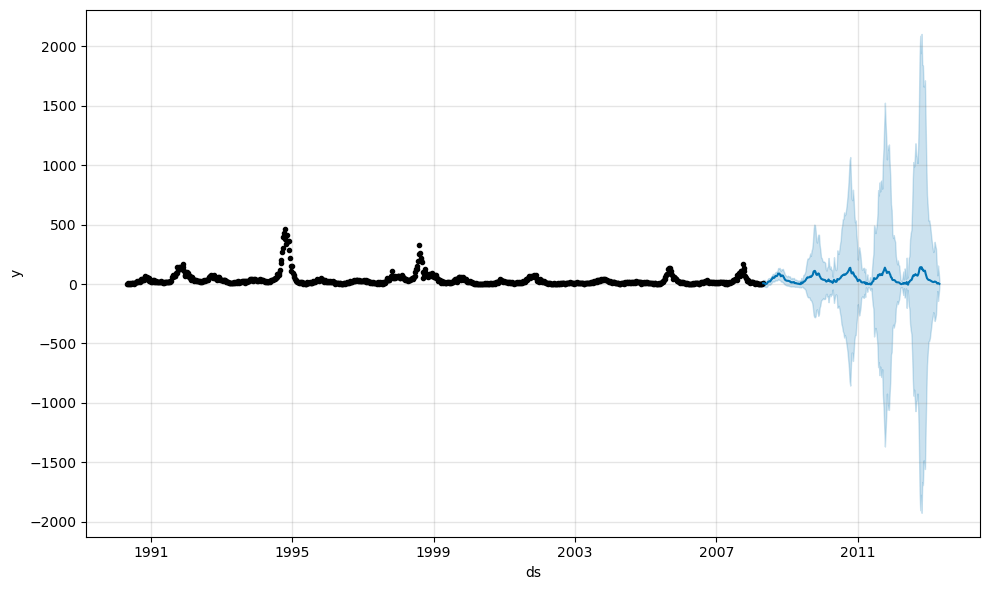

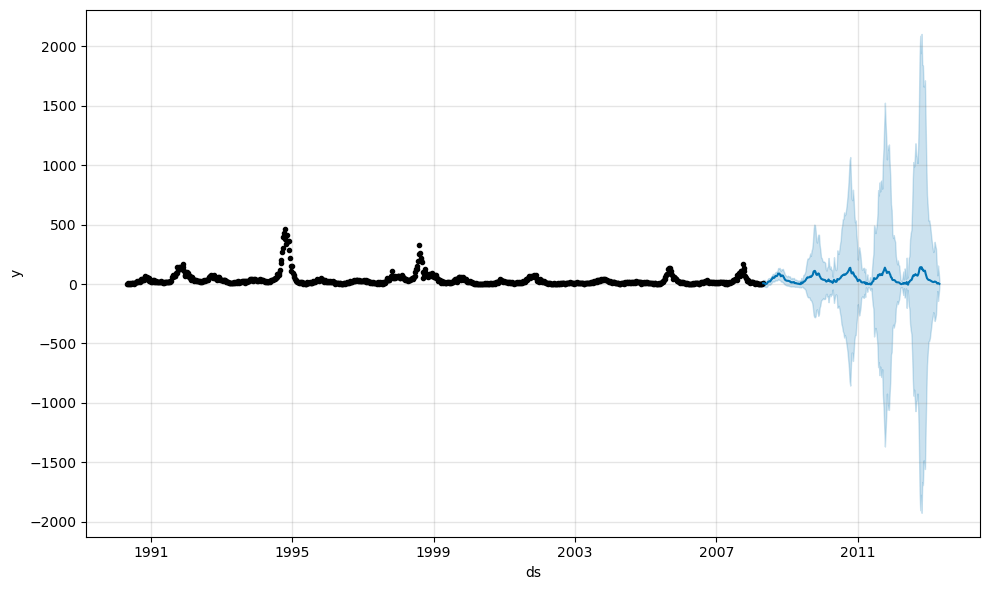

In [156]:
m.plot(forecast_sj)

In [160]:
iq_data = data[data['city'] == 'iq']
iq_data = process_data(iq_data)


In [162]:
iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [163]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [168]:
test_df_iq = test_df_main[test_df_main['city']=='iq']

test_df_iq = process_data(test_df_iq)

test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)


In [169]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','reanalysis_dew_point_temp_k','station_avg_temp_c','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [170]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,reanalysis_dew_point_temp_k,station_avg_temp_c,reanalysis_specific_humidity_g_per_kg,avg_ndvi
260,2010-07-02,298.916286,296.118571,27.440,17.654286,0.175407
261,2010-07-09,298.484000,294.831429,27.025,16.320000,0.303885
262,2010-07-16,298.447429,296.417143,26.950,18.030000,0.260786
263,2010-07-23,296.339429,293.638571,26.900,15.394286,0.089129
264,2010-07-30,298.199143,293.892857,27.050,15.468571,0.287946


In [113]:
# forecast_iq[forecast_iq['yhat'] == 0].count()

In [172]:

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_dew_point_temp_k')
    m.add_regressor('station_avg_temp_c')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_iq = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_iq.add_regressor('avg_reanalysis')
auto_model_iq.add_regressor('reanalysis_dew_point_temp_k')
auto_model_iq.add_regressor('station_avg_temp_c')
auto_model_iq.add_regressor('avg_ndvi')
auto_model_iq.add_regressor('reanalysis_specific_humidity_g_per_kg')





.fit(iq_data)

20:40:44 - cmdstanpy - INFO - Chain [1] start processing
20:40:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:40:48 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] start processing
20:40:49 - cmdstanpy - INFO - Chain [1] done processing
20:40:49 - cmdstanpy - INFO - Chain [1] done pr

20:40:57 - cmdstanpy - INFO - Chain [1] start processing
20:40:57 - cmdstanpy - INFO - Chain [1] done processing
20:40:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:40:57 - cmdstanpy - INFO - Chain [1] start processing
20:40:58 - cmdstanpy - INFO - Chain [1] done processing
20:40:58 - cmdstanpy - INFO - Chain [1] start processing
20:40:58 - cmdstanpy - INFO - Chain [1] done processing
20:40:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:40:58 - cmdstanpy - INFO - Chain [1] start processing
20:40:58 - cmdstanpy - INFO - Chain [1] done processing
20:40:59 - cmdstanpy - INFO - Chain [1] start processing
20:40:59 - cmdstanpy - INFO - Chain [1] done processing
20:40:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] start processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:14 - cmdstanpy - INFO - Chain [1] done processing
20:41:15 - cmdstanpy - INFO - Chain [1] start processing
20:41:15 - cmdstanpy - INFO - Chain [1] start processing
20:41:15 - cmdstanpy - INFO - Chain [1] start processing
20:41:15 - cmdstanpy - INFO - Chain [1] done processing
20:41:15 - cmdstanpy - INFO - Chain [1]

20:41:46 - cmdstanpy - INFO - Chain [1] start processing
20:41:47 - cmdstanpy - INFO - Chain [1] done processing
20:41:47 - cmdstanpy - INFO - Chain [1] start processing
20:41:47 - cmdstanpy - INFO - Chain [1] done processing
20:41:48 - cmdstanpy - INFO - Chain [1] start processing
20:41:52 - cmdstanpy - INFO - Chain [1] done processing
20:41:52 - cmdstanpy - INFO - Chain [1] start processing
20:41:54 - cmdstanpy - INFO - Chain [1] done processing
20:41:54 - cmdstanpy - INFO - Chain [1] start processing
20:41:56 - cmdstanpy - INFO - Chain [1] done processing
20:41:56 - cmdstanpy - INFO - Chain [1] start processing
20:41:57 - cmdstanpy - INFO - Chain [1] done processing
20:41:58 - cmdstanpy - INFO - Chain [1] start processing
20:41:58 - cmdstanpy - INFO - Chain [1] done processing
20:41:58 - cmdstanpy - INFO - Chain [1] start processing
20:41:59 - cmdstanpy - INFO - Chain [1] done processing
20:42:00 - cmdstanpy - INFO - Chain [1] start processing
20:42:00 - cmdstanpy - INFO - Chain [1]

20:42:14 - cmdstanpy - INFO - Chain [1] done processing
20:42:14 - cmdstanpy - INFO - Chain [1] done processing
20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:14 - cmdstanpy - INFO - Chain [1] done processing
20:42:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:14 - cmdstanpy - INFO - Chain [1] done processing
20:42:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:14 - cmdstanpy - INFO - Chain [1] start processing
20:42:15 - cmdstanpy - INFO - Chain [1] done processing
20:42:15 - cmdstanpy - INFO - Chain [1] start processing
20:42:15 - cmdstanpy - INFO - Chain [1] done processing
20:42:15 - cmdstanpy - INFO - Chain [1] done processing
20:42:15 - 

20:42:22 - cmdstanpy - INFO - Chain [1] start processing
20:42:22 - cmdstanpy - INFO - Chain [1] done processing
20:42:22 - cmdstanpy - INFO - Chain [1] start processing
20:42:22 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - INFO - Chain [1] start processing
20:42:23 - cmdstanpy - INFO - Chain [1] done processing
20:42:23 - cmdstanpy - ERROR - Chain [1]

20:42:41 - cmdstanpy - INFO - Chain [1] start processing
20:42:41 - cmdstanpy - INFO - Chain [1] done processing
20:42:41 - cmdstanpy - INFO - Chain [1] done processing
20:42:41 - cmdstanpy - INFO - Chain [1] start processing
20:42:41 - cmdstanpy - INFO - Chain [1] done processing
20:42:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:42 - cmdstanpy - INFO - Chain [1] start processing
20:42:42 - cmdstanpy - INFO - Chain [1] start processing
20:42:42 - cmdstanpy - INFO - Chain [1] done processing
20:42:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:42 - cmdstanpy - INFO - Chain [1] start processing
20:42:42 - cmdstanpy - INFO - Chain [1] done processing
20:42:42 - cmdstanpy - INFO - Chain [1] start processing
20:42:42 - cmdstanpy - INFO - Chain [1] done processing
20:42:42 -

20:42:51 - cmdstanpy - INFO - Chain [1] start processing
20:42:51 - cmdstanpy - INFO - Chain [1] done processing
20:42:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:51 - cmdstanpy - INFO - Chain [1] start processing
20:42:51 - cmdstanpy - INFO - Chain [1] done processing
20:42:52 - cmdstanpy - INFO - Chain [1] start processing
20:42:52 - cmdstanpy - INFO - Chain [1] done processing
20:42:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:42:52 - cmdstanpy - INFO - Chain [1] start processing
20:42:52 - cmdstanpy - INFO - Chain [1] done processing
20:42:52 - cmdstanpy - INFO - Chain [1] done processing
20:42:52 - cmdstanpy - INFO - Chain [1] start processing
20:42:52 - cmdstanpy - INFO - Chain [1] done processing
20:42:52 - cmdstanpy - INFO - Chain [1] start processing
20:42:52 -

20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:00 - cmdstanpy - INFO - Chain [1] done processing
20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:00 - cmdstanpy - INFO - Chain [1] done processing
20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:00 - cmdstanpy - INFO - Chain [1] done processing
20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:00 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - INFO - Chain [1] start processing
20:43:01 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - INFO - Chain [1] start processing
20:43:01 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - INFO - Chain [1] start processing
20:43:01 - cmdstanpy - INFO - Chain [1] done processing
20:43:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
O

20:43:53 - cmdstanpy - INFO - Chain [1] done processing
20:43:54 - cmdstanpy - INFO - Chain [1] start processing
20:43:54 - cmdstanpy - INFO - Chain [1] done processing
20:43:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:43:54 - cmdstanpy - INFO - Chain [1] start processing
20:43:54 - cmdstanpy - INFO - Chain [1] done processing
20:43:54 - cmdstanpy - INFO - Chain [1] start processing
20:43:54 - cmdstanpy - INFO - Chain [1] done processing
20:43:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:43:54 - cmdstanpy - INFO - Chain [1] start processing
20:43:55 - cmdstanpy - INFO - Chain [1] done processing
20:43:55 - cmdstanpy - INFO - Chain [1] done processing
20:43:55 - cmdstanpy - INFO - Chain [1] start processing
20:43:55 - cmdstanpy - INFO - Chain [1] done processing
20:43:55 - 

20:44:08 - cmdstanpy - INFO - Chain [1] done processing
20:44:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:08 - cmdstanpy - INFO - Chain [1] start processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] start processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] start processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] start processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] start processing
20:44:09 - cmdstanpy - INFO - Chain [1] done processing
20:44:09 - cmdstanpy - INFO - Chain [1] start processin

20:44:16 - cmdstanpy - INFO - Chain [1] done processing
20:44:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:16 - cmdstanpy - INFO - Chain [1] done processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:16 - cmdstanpy - INFO - Chain [1] done processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 - cmdstanpy - INFO - Chain [1] done processing
20:44:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:17 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 - cmdstanpy - INFO - Chain [1] done processing
20:44:17 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 

20:44:29 - cmdstanpy - INFO - Chain [1] start processing
20:44:29 - cmdstanpy - INFO - Chain [1] done processing
20:44:29 - cmdstanpy - INFO - Chain [1] start processing
20:44:29 - cmdstanpy - INFO - Chain [1] done processing
20:44:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:29 - cmdstanpy - INFO - Chain [1] start processing
20:44:30 - cmdstanpy - INFO - Chain [1] done processing
20:44:30 - cmdstanpy - INFO - Chain [1] done processing
20:44:30 - cmdstanpy - INFO - Chain [1] start processing
20:44:30 - cmdstanpy - INFO - Chain [1] done processing
20:44:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:30 - cmdstanpy - INFO - Chain [1] start processing
20:44:30 - cmdstanpy - INFO - Chain [1] start processing
20:44:30 - cmdstanpy - INFO - Chain [1] done processing
20:44:30 -

20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] done processing
20:44:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] done processing
20:44:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] done processing
20:44:38 - cmdstanpy - INFO - Chain [1] start processing
20:44:38 - cmdstanpy - INFO - Chain [1] done processing
20:44:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated ab

20:44:46 - cmdstanpy - INFO - Chain [1] done processing
20:44:46 - cmdstanpy - INFO - Chain [1] done processing
20:44:46 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] start processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] done processing
20:44:47 - cmdstanpy - INFO - Chain [1] s

20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:45:21 - cmdstanpy - INFO - Chain [1] start processing
20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - INFO - Chain [1] start processing
20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:45:21 - cmdstanpy - INFO - Chain [1] start processing
20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - INFO - Chain [1] start processing
20:45:21 - cmdstanpy - INFO - Chain [1] done processing
20:45:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abno

20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] start processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:31 - cmdstanpy - INFO - Chain [1] done processing
20:45:32 - cmdstanpy - INFO - Chain [1] start processing
20:45:32 - cmdstanpy - INFO - Chain [1] done processing
20:45:32 - cmdstanpy - INFO - Chain [1] start process

20:45:40 - cmdstanpy - INFO - Chain [1] done processing
20:45:40 - cmdstanpy - INFO - Chain [1] start processing
20:45:40 - cmdstanpy - INFO - Chain [1] done processing
20:45:40 - cmdstanpy - INFO - Chain [1] start processing
20:45:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:45 - cmdstanpy - INFO - Chain [1] done processing
20:45:45 - cmdstanpy - INFO - Chain [1] done processing
20:45:45 - cmdstanpy - INFO - Chain [1] done processing
20:45:45 - cmdstanpy - INFO - Chain [1] start processing
20:45:45 - cmdstanpy - INFO - Chain [1] start processing
20:45:45 - cmdstanpy - INFO - Chain [1] start processing
20:45:45 - cmdstanpy - INFO - Chain [1] done pr

20:45:52 - cmdstanpy - INFO - Chain [1] start processing
20:45:52 - cmdstanpy - INFO - Chain [1] done processing
20:45:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:45:52 - cmdstanpy - INFO - Chain [1] start processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - cmdstanpy - INFO - Chain [1] start processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:45:53 - cmdstanpy - INFO - Chain [1] start processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - cmdstanpy - INFO - Chain [1] start processing
20:45:53 - cmdstanpy - INFO - Chain [1] done processing
20:45:53 - 

20:46:00 - cmdstanpy - INFO - Chain [1] start processing
20:46:00 - cmdstanpy - INFO - Chain [1] start processing
20:46:00 - cmdstanpy - INFO - Chain [1] done processing
20:46:00 - cmdstanpy - INFO - Chain [1] done processing
20:46:00 - cmdstanpy - INFO - Chain [1] start processing
20:46:00 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1]

20:46:28 - cmdstanpy - INFO - Chain [1] done processing
20:46:28 - cmdstanpy - INFO - Chain [1] start processing
20:46:30 - cmdstanpy - INFO - Chain [1] done processing
20:46:30 - cmdstanpy - INFO - Chain [1] start processing
20:46:30 - cmdstanpy - INFO - Chain [1] done processing
20:46:30 - cmdstanpy - INFO - Chain [1] start processing
20:46:31 - cmdstanpy - INFO - Chain [1] done processing
20:46:31 - cmdstanpy - INFO - Chain [1] start processing
20:46:31 - cmdstanpy - INFO - Chain [1] done processing
20:46:32 - cmdstanpy - INFO - Chain [1] start processing
20:46:33 - cmdstanpy - INFO - Chain [1] done processing
20:46:33 - cmdstanpy - INFO - Chain [1] start processing
20:46:34 - cmdstanpy - INFO - Chain [1] done processing
20:46:34 - cmdstanpy - INFO - Chain [1] start processing
20:46:35 - cmdstanpy - INFO - Chain [1] done processing
20:46:35 - cmdstanpy - INFO - Chain [1] start processing
20:46:36 - cmdstanpy - INFO - Chain [1] done processing
20:46:36 - cmdstanpy - INFO - Chain [1] 

20:46:43 - cmdstanpy - INFO - Chain [1] done processing
20:46:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:46:43 - cmdstanpy - INFO - Chain [1] start processing
20:46:43 - cmdstanpy - INFO - Chain [1] done processing
20:46:43 - cmdstanpy - INFO - Chain [1] start processing
20:46:43 - cmdstanpy - INFO - Chain [1] done processing
20:46:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:46:44 - cmdstanpy - INFO - Chain [1] start processing
20:46:44 - cmdstanpy - INFO - Chain [1] done processing
20:46:44 - cmdstanpy - INFO - Chain [1] start processing
20:46:44 - cmdstanpy - INFO - Chain [1] done processing
20:46:44 - cmdstanpy - INFO - Chain [1] start processing
20:46:44 - cmdstanpy - INFO - Chain [1] done processing
20:46:44 - cmdstanpy - ERROR - Chain [1] error: error during proces

20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:55 - cmdstanpy - INFO - Chain [1] start processing
20:46:55 - cmdstanpy - INFO - Chain [1] done processing
20:46:56 - cmdstanpy - INFO - Chain [1] start processing
20:46:56 - cmdstanpy - INFO - Chain [1] done processing
20:46:56 - cmdstanpy - INFO - Chain [1] start processing
20:46:56 - cmdstanpy - INFO - Chain [1] done processing
20:46:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
O

20:47:10 - cmdstanpy - INFO - Chain [1] done processing
20:47:10 - cmdstanpy - INFO - Chain [1] done processing
20:47:10 - cmdstanpy - INFO - Chain [1] start processing
20:47:10 - cmdstanpy - INFO - Chain [1] done processing
20:47:10 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] start processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] done processing
20:47:11 - cmdstanpy - INFO - Chain [1] d

20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] done processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:17 - cmdstanpy - INFO - Chain [1] start processing
20:47:18 - cmdstanpy - INFO - Chain [1] start processing
20:47:18 - cmdstanpy - INFO - Chain [1]

20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:32 - cmdstanpy - INFO - Chain [1] start processing
20:47:32 - cmdstanpy - INFO - Chain [1] done processing
20:47:32 - cmdstanpy - INFO - Chain [1] start processing
20:47:32 - cmdstanpy - INFO - Chain [1] done processing
20:47:32 - cmdstanpy - INFO - Chain [1] start processing
20:47:32 - cmdstanpy - INFO - Chain [1] start processing
20:47:32 - cmdstanpy - INFO - Chain [1] done processing
20:47:32 - cmdstanpy - INFO - Chain [1] 

20:47:42 - cmdstanpy - INFO - Chain [1] done processing
20:47:42 - cmdstanpy - INFO - Chain [1] done processing
20:47:42 - cmdstanpy - INFO - Chain [1] done processing
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:42 - cmdstanpy - INFO - Chain [1] done processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1]

20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing
20:47:52 - cmdstanpy - INFO - Chain [1] 

20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:08 - cmdstanpy - INFO - Chain [1] done processing
20:48:08 - cmdstanpy - INFO - Chain [1] done processing
20:48:08 - cmdstanpy - INFO - Chain [1] start processing
20:48:08 - cmdstanpy - INFO - Chain [1]

20:48:14 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] done processing
20:48:14 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] done processing
20:48:14 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1]

20:48:27 - cmdstanpy - INFO - Chain [1] done processing
20:48:27 - cmdstanpy - INFO - Chain [1] done processing
20:48:27 - cmdstanpy - INFO - Chain [1] start processing
20:48:27 - cmdstanpy - INFO - Chain [1] start processing
20:48:27 - cmdstanpy - INFO - Chain [1] done processing
20:48:27 - cmdstanpy - INFO - Chain [1] done processing
20:48:27 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] 

20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] start processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:44 - cmdstanpy - INFO - Chain [1] done processing
20:48:45 - cmdstanpy - INFO - Chain [1] start processing
20:48:45 - cmdstanpy - INFO - Chain [1] start processing
20:48:45 - cmdstanpy - INFO - Chain [1]

20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] done processing
20:48:53 - cmdstanpy - INFO - Chain [1] done processing
20:48:53 - cmdstanpy - INFO - Chain [1] done processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] start processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1] done processing
20:48:54 - cmdstanpy - INFO - Chain [1]

20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing
20:49:10 - cmdstanpy - INFO - Chain [1] start processing
20:49:10 - cmdstanpy - INFO - Chain [1] start processing
20:49:10 - cmdstanpy - INFO - Chain [1]

20:49:20 - cmdstanpy - INFO - Chain [1] done processing
20:49:20 - cmdstanpy - INFO - Chain [1] start processing
20:49:20 - cmdstanpy - INFO - Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing
20:49:21 - cmdstanpy - INFO - Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing
20:49:22 - cmdstanpy - INFO - Chain [1] done processing
20:49:22 - cmdstanpy - INFO - Chain [1] start processing
20:49:22 - cmdstanpy - INFO - Chain [1] start processing
20:49:22 - cmdstanpy - INFO - Chain [1] done processing
20:49:22 - cmdstanpy - INFO - Chain [1] start processing
20:49:22 - cmdstanpy - INFO - Chain [1] done processing
20:49:22 - cmdstanpy - INFO - Chain [1] start processing
20:49:22 - cmdstanpy - INFO - Chain [1]

20:49:32 - cmdstanpy - INFO - Chain [1] done processing
20:49:32 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] start processing
20:49:33 - cmdstanpy - INFO - Chain [1] done processing
20:49:33 - cmdstanpy - INFO - Chain [1] 

20:49:48 - cmdstanpy - INFO - Chain [1] start processing
20:49:48 - cmdstanpy - INFO - Chain [1] start processing
20:49:48 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] start processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] done processing
20:49:49 - cmdstanpy - INFO - Chain [1] 

20:49:58 - cmdstanpy - INFO - Chain [1] start processing
20:49:58 - cmdstanpy - INFO - Chain [1] done processing
20:49:58 - cmdstanpy - INFO - Chain [1] start processing
20:49:58 - cmdstanpy - INFO - Chain [1] done processing
20:49:58 - cmdstanpy - INFO - Chain [1] done processing
20:49:58 - cmdstanpy - INFO - Chain [1] start processing
20:49:58 - cmdstanpy - INFO - Chain [1] done processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] done processing
20:49:59 - cmdstanpy - INFO - Chain [1] done processing
20:49:59 - cmdstanpy - INFO - Chain [1] done processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] done processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:49:59 - cmdstanpy - INFO - Chain [1] start processing
20:50:00 - cmdstanpy - INFO - Chain [1]

20:50:27 - cmdstanpy - INFO - Chain [1] done processing
20:50:27 - cmdstanpy - INFO - Chain [1] start processing
20:50:27 - cmdstanpy - INFO - Chain [1] start processing
20:50:27 - cmdstanpy - INFO - Chain [1] done processing
20:50:27 - cmdstanpy - INFO - Chain [1] done processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] start processing
20:50:28 - cmdstanpy - INFO - Chain [1] done processing
20:50:29 - cmdstanpy - INFO - Chain [1] done processing
20:50:29 - cmdstanpy - INFO - Chain [1] 

20:51:10 - cmdstanpy - INFO - Chain [1] start processing
20:51:10 - cmdstanpy - INFO - Chain [1] start processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
20:51:13 - cmdstanpy - INFO - Chain [1] start processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
20:51:13 - cmdstanpy - INFO - Chain [1] start processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
20:51:13 - cmdstanpy - INFO - Chain [1] start processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
20:51:13 - cmdstanpy - INFO - Chain [1] start processing
20:51:14 - cmdstanpy - INFO - Chain [1] done processing
20:51:14 - cmdstanpy - INFO - Chain [1] done processing
20:51:14 - cmdstanpy - INFO - Chain [1] start processing
20:51:14 - cmdstanpy - INFO - Chain [1] done processing
20:51:14 - cmdstanpy - INFO - Chain [1] start processing
20:51:14 - cmdstanpy - INFO - Chain [1] start processing
20:51:14 - cmdstanpy - INFO - Chain [1]

20:51:21 - cmdstanpy - INFO - Chain [1] start processing
20:51:21 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:23 - cmdstanpy - INFO - Chain [1] start processing
20:51:23 - cmdstanpy - INFO - Chain [1] done processing
20:51:23 - cmdstanpy - INFO - Chain [1] 

20:51:52 - cmdstanpy - INFO - Chain [1] done processing
20:51:52 - cmdstanpy - INFO - Chain [1] start processing
20:51:52 - cmdstanpy - INFO - Chain [1] start processing
20:51:52 - cmdstanpy - INFO - Chain [1] done processing
20:51:52 - cmdstanpy - INFO - Chain [1] done processing
20:51:52 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] done processing
20:51:53 - cmdstanpy - INFO - Chain [1] done processing
20:51:53 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] done processing
20:51:53 - cmdstanpy - INFO - Chain [1] done processing
20:51:53 - cmdstanpy - INFO - Chain [1] start processing
20:51:53 - cmdstanpy - INFO - Chain [1] start processing
20:51:54 - cmdstanpy - INFO - Chain [1] done processing
20:51:54 - cmdstanpy - INFO - Chain [1] done processing
20:51:54 - cmdstanpy - INFO - Chain [1] 

20:52:19 - cmdstanpy - INFO - Chain [1] done processing
20:52:19 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
20:52:23 - cmdstanpy - INFO - Chain [1] start processing
20:52:23 - cmdstanpy - INFO - Chain [1] start processing
20:52:23 - cmdstanpy - INFO - Chain [1] start processing
20:52:23 - cmdstanpy - INFO - Chain [1] start processing
20:52:23 - cmdstanpy - INFO - Chain [1] done processing
20:52:24 - cmdstanpy - INFO - Chain [1] done processing
20:52:24 - cmdstanpy - INFO - Chain [1] done processing
20:52:24 - cmdstanpy - INFO - Chain [1] start processing
20:52:24 - cmdstanpy - INFO - Chain [1] start processing
20:52:24 - cmdstanpy - INFO - Chain [1] start processing
20:52:24 - cmdstanpy - INFO - Chain [1] done processing
20:52:24 - cmdstanpy - INFO - Chain [1] done processing
20:52:24 - cmdstanpy - INFO - Chain [1] done pro

20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1]

20:54:06 - cmdstanpy - INFO - Chain [1] start processing
20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing
20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing
20:54:06 - cmdstanpy - INFO - Chain [1] done processing
20:54:06 - cmdstanpy - INFO - Chain [1] start processing
20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing
20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing
20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:07 - cmdstanpy - INFO - Chain [1] start processing
20:54:07 - cmdstanpy - INFO - Chain [1] done processing
20:54:08 - cmdstanpy - INFO - Chain [1] start processing
20:54:08 - cmdstanpy - INFO - Chain [1] done processing
20:54:08 - cmdstanpy - INFO - Chain [1] start processing
20:54:08 - cmdstanpy - INFO - Chain [1]

20:54:23 - cmdstanpy - INFO - Chain [1] start processing
20:54:23 - cmdstanpy - INFO - Chain [1] start processing
20:54:23 - cmdstanpy - INFO - Chain [1] start processing
20:54:23 - cmdstanpy - INFO - Chain [1] done processing
20:54:23 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:24 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:24 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] done processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:24 - cmdstanpy - INFO - Chain [1] start processing
20:54:25 - cmdstanpy - INFO - Chain [1] done processing
20:54:25 - cmdstanpy - INFO - Chain [1] done processing
20:54:25 - cmdstanpy - INFO - Chain [1]

20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] start processing
20:54:47 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1] done processing
20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:48 - cmdstanpy - INFO - Chain [1]

20:56:12 - cmdstanpy - INFO - Chain [1] done processing
20:56:12 - cmdstanpy - INFO - Chain [1] start processing
20:56:14 - cmdstanpy - INFO - Chain [1] done processing
20:56:15 - cmdstanpy - INFO - Chain [1] start processing
20:56:16 - cmdstanpy - INFO - Chain [1] done processing
20:56:16 - cmdstanpy - INFO - Chain [1] start processing
20:56:19 - cmdstanpy - INFO - Chain [1] done processing
20:56:19 - cmdstanpy - INFO - Chain [1] start processing
20:56:21 - cmdstanpy - INFO - Chain [1] done processing
20:56:21 - cmdstanpy - INFO - Chain [1] start processing
20:56:27 - cmdstanpy - INFO - Chain [1] done processing
20:56:28 - cmdstanpy - INFO - Chain [1] start processing
20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing
20:56:34 - cmdstanpy - INFO - Chain [1] done processing
20:56:34 - cmdstanpy - INFO - Chain [1] start processing
20:56:37 - cmdstanpy - INFO - Chain [1] done processing
20:56:37 - cmdstanpy - INFO - Chain [1] 

20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing
20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing
20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:02 - cmdstanpy - INFO - Chain [1] start processing
20:57:02 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] start processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] start processing
20:57:03 - cmdstanpy - INFO - Chain [1] start processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] done processing
20:57:03 - cmdstanpy - INFO - Chain [1] start processing
20:57:03 - cmdstanpy - INFO - Chain [1] 

In [218]:
forecast_iq = auto_model_iq.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,5.100768,-6.792400,18.533629
142,2013-03-26,4.222955,-8.615346,16.649856
143,2013-04-02,3.350744,-9.097550,15.745604
144,2013-04-09,2.341350,-10.498855,14.352874
145,2013-04-16,2.381619,-10.169883,14.190877
146,2013-04-23,2.829988,-10.437726,14.850985
147,2013-04-30,-0.073154,-12.754765,12.275159
148,2013-05-07,2.281012,-9.067563,14.160141
149,2013-05-14,2.162906,-10.714553,13.884607
150,2013-05-21,1.245380,-11.319862,11.585178


In [219]:
sj_pred = forecast_sj.yhat.round(0).astype(int)
#sj_pred[sj_pred<0] = 0

iq_pred = forecast_iq.yhat.round(0).astype(int)
#iq_pred[iq_pred<0] = 0

In [220]:

pred=pd.read_csv('./Data/submission_format.csv', index_col=[0,1,2])
#pred = pred.set_index(['city','year','weekofyear']).drop('total_cases', axis=1)


In [221]:
pred_yhat = pd.DataFrame(pd.concat([sj_pred,iq_pred]))#.reset_index()
pred_yhat

pred['total_cases'] = pred_yhat.to_numpy()
pred= pred[['total_cases']].round(0).astype(int)
pred

total_cases
city year weekofyear             
sj   2008 18                    7
          19                    6
          20                    6
          21                    0
          22                    0
          23                    1
          24                    8
          25                   17
          26                   21
          27                   22
          28                   21
          29                   28
          30                   38
          31                   42
          32                   55
          33                   54
          34                   51
          35                   57
          36                   68
          37                   67
          38                   66
          39                   73
          40                   88
          41                   87
          42                   87
          43                   77
          44                   65
          45                   72
          46                   71
          47                   70
          48                   60
          49                   49
          50                   38
          51                   32
          52                   29
     2009 1                    27
          2                    27
          3                    26
          4                    24
          5                    23
          6                    16
          7                    13
          8                    15
          9                    13
          10                   15
          11                   17
          12                    9
          13                    7
          14                    8
          15                    5
          16                    3
          17                    3
          18                    3
          19                   -1
          20                    3
          21                   -2
          22                   13
          23                    6
          24                    9
          25                   19
          26                   20
          27                   23
          28                   30
          29                   40
          30                   49
          31                   56
          32                   55
          33                   56
          34                   57
          35                   63
          36                   59
          37                   65
          38                   70
          39                   81
          40                  103
          41                  110
          42                  110
          43                   99
          44                   80
          45                   76
          46                   81
          47                   89
          48                   87
          49                   66
          50                   57
          51                   46
          52                   41
     2010 53                   40
          1                    35
          2                    36
          3                    34
          4                    33
          5                    23
          6                    20
          7                    26
          8                    26
          9                    38
          10                   27
          11                   21
          12                   25
          13                   20
          14                   19
          15                    9
          16                   21
          17                   35
          18                   26
          19                   19
          20                   18
          21                   20
          22                   42
          23                   40
          24                   37
          25                   43
          26                   49
          27                   54
          28                   65
          

In [222]:
pred.to_csv('prophet_results_addregressor.csv')